<a href="https://colab.research.google.com/github/compartia/nlp_tools/blob/vadim/UI_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#.init

##utils

In [0]:
import IPython
import uuid
from google.colab import output
from google.colab import files

from __future__ import print_function

from google.colab import widgets
from google.colab import output



# from google.colab import files

def interactive_upload(filetype):
  
  import docx2txt
  
  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs=[]
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text
  
    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs
  
  
  
  
class InvokeButton(object):
  def __init__(self, title, callback = None):
    self.title = title
    self.callback = callback

  # def _repr_html_(self):
  def render(self):
    self.callback_id = 'button-' + str(uuid.uuid4())
    if self.callback:
      output.register_callback(self.callback_id, self.callback)

    template =f'''<button style="padding:5px; font-size:16px; margin:15px"  id="{self.callback_id}">{self.title}</button>
        <script>
          document.querySelector("#{self.callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction("{self.callback_id}", [], {{}})
            e.preventDefault();
          }};
        </script>'''
    display(IPython.display.HTML(template))
  
  
  def render_to(self, tb, tab, cleartab = False):
    with tb.output_to(tab):
      if cleartab:
        tb.clear_tab()
      self.render()
      
  def render_to_element(self, id):
    with output.redirect_to_element(f'#{id}'):    
      self.render()
  

      

def clear_div(elementID):
  display(IPython.display.Javascript(f'document.getElementById("{elementID}").innerHTML = "";'))

def replace_self_elem(elementID, text):
  #print(f'Replace: {elementID}')
  display(IPython.display.Javascript(f'document.getElementById("{elementID}").parentElement.innerHTML = "{text}";'))

def toggle_element(elementId):
  display(IPython.display.Javascript(f''' 
    var x = document.getElementById("{elementId}");
    if (x.style.display === "none")
      x.style.display = "block";
    else
      x.style.display = "none";
    '''))

  
  
GLOBALS__ = {}

#Демо

In [2]:
#@title Настройки { run: "auto", vertical-output: true, display-mode: "form" }
USD_to_RUB = 264.02 #@param {type:"number"}
RUB_to_USD = 1.0/USD_to_RUB

# print('USD_to_RUB=',USD_to_RUB)
# print('RUB_to_USD=',RUB_to_USD)



currency_converter = {
  'USD': USD_to_RUB,
  'RUB': 1.0
}

print(currency_converter)

{'USD': 264.02, 'RUB': 1.0}


In [3]:
# @title инициализация подсистем { output-height: 800, form-width: "300px", display-mode: "form" }


import os
import sys


def interactive_upload(filetype):
  from google.colab import files
  import docx2txt

  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs = []
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text

    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs


# ====================================
# ====================================
_git_branch = "vadim"  # @param {type:"string"}
# ====================================
# ====================================


# ''' AZ:-IMPORT CODE GITHUB----------------------------------------------😺------ '''
import sys


def _init_import_code_from_gh():
  if 'GLOBALS__' not in globals():
    print('adding global GLOBALS__')
    global GLOBALS__
    GLOBALS__ = {}

  if '_init_import_code_from_gh' in GLOBALS__:
    print('👌 code already imported from GitHub!')
    return

  import subprocess
  def exec(x):
    r = subprocess.check_output(x, shell=True)
    r = r.decode('unicode-escape').encode('latin1').decode('utf8')
    print(r)

  print(f"fetching code from GitHub.....{_git_branch}")
  try:
    exec('rm -r nlp_tools')
  except:
    pass
  exec(f'git clone --single-branch --branch {_git_branch} https://github.com/compartia/nlp_tools.git nlp_tools')

  print('🦊 GIT revision:')
  exec('cd nlp_tools\ngit rev-list --reverse HEAD | awk "{ print NR }" | tail -n 1\ngit branch\ngit log -3 --pretty=%B')

  sys.path.insert(0, 'nlp_tools')

  # self-test
  from text_tools import untokenize
  print(untokenize(['code', 'imported', 'OK 👍']))

  print('installing antiword...')
  exec('sudo apt-get install antiword')

  print('installing docx2txt...')
  exec("pip install docx2txt")

  GLOBALS__['_init_import_code_from_gh'] = True

  ''' AZ:-------------------------------------------------IMPORT CODE GITHUB-😺---'''
  print('❤️ DONE importing Code fro GitHub')


# AZ:-INIT ELMO-----------------------------------------------------------------------------------

import tensorflow as tf
import tensorflow_hub as hub


def _import_elmo():
  """
  ACHTUNG!! this method is called later by ElmoEmbedder
  """

  elmo = hub.Module('https://storage.googleapis.com/az-nlp/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz',
                    trainable=False)  # news
  #   elmo = hub.Module('https://storage.googleapis.com/az-nlp/elmo_ru-twitter_2013-01_2018-04_600k_steps.tar.gz',
  #                     trainable=False)  # twitter
  print('❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module ')
  print('Tensorflow version is', tf.__version__)

  return elmo


# AZ:-INIT EMBEDDER-----------------------------------------------------------------------------------

def _init_embedder():
  if 'elmo_embedder' in GLOBALS__:
    print('👌 Embedder is already created! ')
    return

  from embedding_tools import ElmoEmbedder
  GLOBALS__['elmo_embedder'] = ElmoEmbedder(_import_elmo(), tf, 'elmo', _import_elmo)

  print('❤️ DONE creating words embedding model')
  return GLOBALS__['elmo_embedder']


# AZ:-Init chartes context-----------------------------------------------------------------------------------
def _init_charters():
  if 'CharterAnlysingContext' in GLOBALS__:
    print('👌 Charters-related tools are already inited ')
    return

  _init_embedder()  # PRECONDITION
  from charter_patterns import CharterPatternFactory
  from charter_parser import CharterDocumentParser
  CPF = CharterPatternFactory(GLOBALS__['elmo_embedder'])
  GLOBALS__['CharterAnlysingContext'] = CharterDocumentParser(CPF)
  print('❤️ DONE initing Charters-related tools and models ')


def _init_contracts():
  if 'ContractAnlysingContext' in GLOBALS__:
    print('👌 Contracts-related tools are already inited ')
    return

  from contract_parser import ContractAnlysingContext
  GLOBALS__['ContractAnlysingContext'] = ContractAnlysingContext(GLOBALS__['elmo_embedder'], GLOBALS__['renderer'])
  print('❤️ DONE initing Contracts-related tools and models ')


# AZ:- THE CODE----------------------------------------------------------------------------------
from typing import List


def _init_the_code(reset=False):
  if '_init_the_code' in GLOBALS__ and not reset:
    print('👌 Code is alredy imported!')
    return

  from transaction_values import ValueConstraint

  import matplotlib as mpl
  from IPython.core.display import display, HTML
  import matplotlib.pyplot as plt
  
  from renderer import AbstractRenderer, HtmlRenderer, head_types_colors
  from renderer import to_multicolor_text, as_headline_3, as_offset
  from renderer import as_msg, as_quote, as_c_quote
  from renderer import as_error_html, known_subjects_dict, v_color_map
  from transaction_values import ValueConstraint
  from parsing import head_types_dict, head_types
  from legal_docs import PatternSearchResults, ConstraintsSearchResult, PatternSearchResult, CharterDocument
  
  import numpy as np
  
  from charter_patterns import known_subjects
  from patterns import AV_SOFT, AV_PREFIX
  from structures import ContractSubject
  from contract_parser import ContractDocument3

  def _as_smaller(txt):
    return f'<div font-size:12px">{txt}</div>'
 
  
      
  class DemoRenderer(HtmlRenderer):

    def render_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      print('render_color_text')
      html = self.to_color_text(tokens, weights, colormap, print_debug, _range)
      display(HTML(html))
                

    def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      if len(tokens) == 0:
        return " - empty -"
      if len(weights) != len(tokens):
        raise ValueError("number of weights differs weights={} tokens={}".format(len(weights), len(tokens)))

      #   if()
      vmin = min(weights)
      vmax = max(weights)

      if _range is not None:
        vmin = _range[0]
        vmax = _range[1]

      if print_debug:
        print(vmin, vmax)

      norm = mpl.colors.Normalize(vmin=vmin - 0.5, vmax=vmax)
      html = ""
      cmap = mpl.cm.get_cmap(colormap)

      for d in range(0, len(weights)):
        word = tokens[d]
        if word == ' ':
          word = '&nbsp;_ '

        html += '<span title="{} {:.4f}" style="background-color:{}">{} </span>'.format(
          d,
          weights[d],
          mpl.colors.to_hex(cmap(norm(weights[d]))),
          word)

        #     html+='<span style="background-color:' +mpl.colors.to_hex(cmap(norm(weights[d]) ))+ '">' + str(tokens[d]) + " </span>"
        if tokens[d] == '\n':
          html += "<br>"

      return html

    ''' AZ:-Rendering CHARITY🔥-----💸------💸-------💸------------------------------'''
    def render_multicolor_text(self, tokens, vectors, colormap, min_color=None, _slice=None):
      display(HTML(to_multicolor_text(tokens, vectors, colormap, min_color=min_color, _slice=_slice)))

    

    ''' AZ:------💸------💸-------💸----------------------END--Rendering CHARITY🔥------'''

    



    def render_subj(self, contract: ContractDocument3):
      subjects: List[ProbableValue] = contract.subjects

      if len(subjects) > 0:
        sorted_ = [y for y in sorted(subjects, key=lambda x: -x.confidence)]
        subject_kind = sorted_[0].value
        confidence = sorted_[0].confidence
      else:
        subject_kind = ContractSubject.Other

      if subject_kind in known_subjects_dict:
        rendering_name = known_subjects_dict[subject_kind]
      else:
        rendering_name = 'прочее'

      display(
        HTML(f'Предмет договора:'
             f'<h3 style="margin:0">{rendering_name}<sup> {subject_kind}</sup> </h3> '
             f'confidence:{confidence:20,.2f}'))



    def sign_to_text(self, sign: int):
      if sign < 0: return " &lt; "
      if sign > 0: return " &gt; "
      return ' = '

    def probable_value_to_html(self, pv):
      vc = pv.value
      color = '#333333'
      if vc.sign > 0:
        color = '#993300'
      elif vc.sign < 0:
        color = '#009933'

      return f'<b style="color:{color}">{self.sign_to_text(vc.sign)} {vc.currency} {vc.value:20,.2f} confidence={pv.confidence:20,.2f}</b> '

    def render_contents(self, doc):
      html = as_headline_3('Выявленное Содержание документа')
      html += "<ul>"
      for i in doc.structure.headline_indexes:
        line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li> {line} <sup>line {i}</sup></li>'
      html += "</ul>"

      display(HTML(html))

    def render_sections(self, sections):
      from legal_docs import HeadlineMeta
      html = as_headline_3('Выявленное секции документа')
      html += "<ul>"
      for section_type in sections:
        section: HeadlineMeta = sections[section_type]
        body = section.body.untokenize_cc()[:1000]
        headline = section.subdoc.untokenize_cc()[:500]
        #     line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li><h3> {headline} <sup>type: {section_type}</sup> </h3> <p>{body}</p> </li>'
      html += "</ul>"

      display(HTML(html))

    def render_values(self, values):
      if len(values) > 0:
        for pv in values:
          h = self.probable_value_to_html(pv)
          display(HTML(h))
      else:
        display(HTML('сумма не найдена'))

    def render_value_section_details(self, value_section_info):
      value_section = value_section_info.body
      headline_doc = value_section_info.subdoc

      headline = headline_doc.untokenize_cc()

      v_names = {
        'value_attention_vector',
        'novalue_attention_vector',

        'novalue_attention_vector_local_contrast',
        'value_attention_vector_tuned'}

      fig = plt.figure(figsize=(20, 6))
      ax = plt.axes()
      for vector_name in v_names:
        ax.plot(value_section.distances_per_pattern_dict[vector_name], label=vector_name, alpha=0.4)

      ax.plot(value_section.distances_per_pattern_dict['value_attention_vector_tuned'], label='value_attention result',
              alpha=0.9, color='black')
      plt.legend(loc='upper right')

      text = self.to_color_text(value_section.tokens_cc,
                                value_section.distances_per_pattern_dict['value_attention_vector_tuned'], _range=(0, 1))
      html = f'{ as_headline_3(headline)} <div style="margin-left:4em; font-size=90%">{text}</div>'
      display(HTML(html))

     
    def render_charter_parsing_results_2(self, charter):
      display(HTML(self.charter_parsing_results_to_html(charter)))
      
    def render_charter_parsing_results(self, doc, org, rz, charity_constraints):
      WARN = '\033[1;31m======== Dear Artem, ACHTUNG! 🔞 '
      print (WARN+f"use {self.render_charter_parsing_results} is deprecated")
      txt_html = self.to_color_text(org['tokens'], org['attention_vector'], _range=[0, 1])

      html = '<div style="background:#eeeeff; padding:0.5em"> recognized NE(s): <br><br> org type:<h3 style="margin:0">  {} </h3>org full name:<h2 style="margin:0">  {} </h2> <br>quote: <div style="font-size:90%; background:white">{}</div> </div>'.format(
        org['type_name'], org['name'], txt_html)
      # html+=txt_html
      html += self.render_constraint_values(doc, rz, charity_constraints)

      display(HTML(html))

 

     

    
 

  GLOBALS__['renderer'] = DemoRenderer()

  # AZ:----------PROTOCOLS RENDERER-------------------------

  from legal_docs import LegalDocument

  import matplotlib as mpl
  from IPython.core.display import display, HTML
  from renderer import as_headline_3, as_headline_4
  
  class ProtocolRenderer(DemoRenderer):

    def winning_patterns_to_html(self, _tokens, ranges, winning_patterns, _range,
                                 colormaps=['Reds', 'Purples', 'Blues', 'Greens', 'Greys']):
      vmin = -ranges[1]
      vmax = -ranges[0]

      #     print("winning_patterns_to_html _range", _range, "min max=", ranges)

      norm = mpl.colors.Normalize(vmax=vmax, vmin=vmin)

      cmaps = []

      #     print (colormaps)
      for n in colormaps:
        cmap = mpl.cm.get_cmap(n)
        cmaps.append(cmap)

      html = ""

      for d in _range:
        winning_pattern_i = winning_patterns[d][0]
        colormap = cmaps[winning_pattern_i % len(colormaps)]
        normed = norm(-winning_patterns[d][1])
        color = mpl.colors.to_hex(colormap(normed))
        html += '<span title="' + '{} {:.2f}'.format(d, winning_patterns[d][
          1]) + '" style="background-color:' + color + '">' + str(
          _tokens[d]) + " </span>"
        if _tokens[d] == '\n':
          html += "<br>"

      return html

    def _render_doc_subject_fragments(self, doc):
      #     print(doc.per_subject_distances)

      _html = ""
      if doc.per_subject_distances is not None:

        type = "Договор  благотворительного пожертвования"
        if doc.per_subject_distances[0] > doc.per_subject_distances[1]:
          type = "Договор возмездного оказания услуг"

        _html += "<h3>" + type + "</h3>"

        colormaps = ['PuRd'] * 5 + ['Blues'] * 7 + ['Greys']

        _html += as_headline_4('Предмет договора')

        for region in [doc.subj_range]:
          _html += self.winning_patterns_to_html(_tokens=doc.tokens, ranges=doc.subj_ranges,
                                                 winning_patterns=doc.winning_subj_patterns, _range=region,
                                                 colormaps=colormaps)

      return _html

    def render_subject(self, counter):
      html = as_headline_3('Предмет документа (X):') + self.subject_type_weights_to_html(counter)
      display(HTML(html))

    def print_results(self, _doc: LegalDocument, results=None):

      if results is None:
        results = _doc.found_sum

      result, (start, end), sentence, meta = results

      html = "<hr>"

      html += self._render_doc_subject_fragments(_doc)

      if result is None:
        html += '<h2 style="color:red">СУММА НЕ НАЙДЕНА</h2>'
      else:
        html += '<h2>' + str(result[0]) + ' ' + str(result[1]) + '</h2>'

      for key in meta.keys():
        html += '<div style="font-size:9px">' + str(key) + " = " + str(meta[key]) + "</div>"

      display(HTML(html))
      self.render_color_text(_doc.tokens[start:end], _doc.sums[start:end])

    def subject_type_weights_to_html(self, counter):
      dict = {
        't_dea': 'Сделка',
        't_cha': 'Благотворительность',
        't_org': 'Организационные решения'
      }

      maxkey = "None"
      for key in dict:
        if counter[key] > counter[maxkey]:
          maxkey = key

      html = ""
      for key in dict:
        templ = "<div>{}: {}</div>"
        if key == maxkey:
          templ = '<b style="font-size:135%; color:maroon">{}: {}</b>'
        html += templ.format(counter[key], dict[key])

      return html

  GLOBALS__['ProtocolRenderer'] = ProtocolRenderer()

  from demo_protocols import ProtocolAnlysingContext
  GLOBALS__['ProtocolAnlysingContext'] = ProtocolAnlysingContext(GLOBALS__['elmo_embedder'], GLOBALS__['ProtocolRenderer'])
  GLOBALS__['_init_the_code'] = True

  # AZ:-------------------------------------------------Init Protocols context===

  # AZ:-------------------------------------------------Init Charters context====

  def read_doc(fn):
    import docx2txt, sys, os
    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()

    return text

  GLOBALS__['read_doc'] = read_doc

  print("❤️ DONE initializing the code")


# AZ:-FINDING_VIOLATIONS--------------------------------------------------------
def find_and_show_violations():
  from IPython.core.display import display, HTML

  from contract_parser import ContractAnlysingContext
  from renderer import as_headline_2, as_error_html

  print('Поиск нарушений')

  charterAnlysingContext: CharterAnlysingContext = GLOBALS__['CharterAnlysingContext']
  contractAnlysingContext: ContractAnlysingContext = GLOBALS__['ContractAnlysingContext']

  contract = contractAnlysingContext.contract
  charter = charterAnlysingContext.doc
  charter_constraints = charterAnlysingContext.constraints  # XXX: move to doc

  renderer = GLOBALS__['renderer']
  renderer.render_subj(contract)

  import copy

  def convert(v):
    v_converted = copy.copy(v)
    if v.currency in currency_converter:
      v_converted.value = currency_converter[v.currency] * v.value
      v_converted.currency = 'RUB'
      return v_converted
    else:
      display(HTML(as_error_html(
        f"мы не в настроении (пока) конвертировать {v.currency} --> RUB. Это вообще валюта какой страны? Румынии?")))
      return v

  best_value = contractAnlysingContext.find_contract_best_value(convert)

  # rendering:----------------------------

  def _render_violations(ranges_by_group, best_value):
    for group_key in ranges_by_group:
      group = ranges_by_group[group_key]
      display(HTML(as_headline_2(group['name'])))

      for rk in group['ranges']:
        r = group['ranges'][rk]
        display(HTML(r.check_contract_value(best_value, convert, renderer)))

  print("Сумма Договора:")
  renderer.render_values([best_value])
  renderer.render_color_text(best_value.value.context.tokens, best_value.value.context.attention, _range=[0, 1])

  _render_violations(
    charterAnlysingContext.find_ranges_by_group(charter_constraints, convert, verbose=False),
    best_value)

#   display(HTML(renderer.render_constraint_values(charter_constraints)))


# AZ:--------------------------------------------------------FINDING_VIOLATIONS-

# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXX

_init_import_code_from_gh()

W0425 07:46:56.104188 139902913066880 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


fetching code from GitHub.....vadim


🦊 GIT revision:
386
* vadim
Merge pull request #24 from compartia/contracts-subj

Contracts subj
Less verbose

Fixing 💰 value extraction


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
code imported OK 👍
installing antiword...
Reading package lists...
Building dependency tree...
Reading state information...
antiword is already the newest version (0.37-11build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.

installing docx2txt...

❤️ DONE importing Code fro GitHub


In [4]:
#@title некоторые внутренние функции
#### compare with charter
from structures import ContractSubject, OrgStructuralLevel
import sys
from renderer import as_headline_3

def out_headline(str):
  display(IPython.display.HTML(as_headline_3(str)))  

def f0_compare_with_protocol():
  try:     
    contract = GLOBALS__['ContractAnlysingContext'].contract
    x = max(contract.subjects, key = lambda p: p.confidence)
    contract_subj = x.value
    cv = max(contract.contract_values, key = lambda k: k.value.value)  
    print(f'Сумма контракта: {cv.value.value} {cv.value.currency} вероятность: {cv.confidence}')
    contract_sum = cv.value.value

    protocol = GLOBALS__['ProtocolAnlysingContext'].protocol
    if protocol and protocol.found_sum:
      print(f'Полная инфо:{protocol.found_sum}')
      sum = protocol.found_sum[0][0]
      print(f'Сумма протокола: {sum}')
      
      if sum<contract_sum:
        out_headline('Протокол не соответсвует договору (отличаются суммы)')
      else:
        out_headline('Одобрение по сделке в протоколе получено')
    else:
      out_headline('Нет достаточной информации в протоколе')
  except:
    print(f"💥\033[1;31mОшибка:{sys.exc_info()}\033[1;0m")
    print(traceback.format_exc())

  
def f0_compare_with_charter():

  _CTX = GLOBALS__['CharterAnlysingContext']
  # GLOBALS__['renderer'].render_contents(_CTX.doc)
  # find_and_show_violations()

  contract = GLOBALS__['ContractAnlysingContext'].contract
  x = max(contract.subjects, key = lambda p: p.confidence)
  print(f'max value: {x.value} {x.value.display_string} prob: {x.confidence} ')
  print(f'contract subj: {x.value}')
  contract_subj = x.value
  #print(f'{contract.contract_values}')
  #for cs in contract.contract_values:
  #  print(f'value: {cs.value.value} {cs.value.currency} prob: {cs.confidence}')
  cv = max(contract.contract_values, key = lambda k: k.value.value)  
  print(f'Max contract sum: {cv.value.value} {cv.value.currency} prob: {cv.confidence}')
  contract_sum = cv.value.value

  print('Устав, я сел:')
  ### TEST ###############################
  #contract_subj = ContractSubject.Charity
  ########################################

  ch = GLOBALS__['CharterAnlysingContext'].charter

  DEALS = {ContractSubject.Deal, ContractSubject.Other, ContractSubject.RealEstate}

  def in_range(r, v):
    if r[1]<0:
      return v >= r[0]
    else:
      return r[0]<=v<=r[1]

  ccs = []
  for c in ch._constraints:
    subj = c.subject_mapping['subj']
    if subj == ContractSubject.Lawsuit:
      continue

    if subj == contract_subj or (contract_subj in DEALS and  subj in DEALS):
      print(f'\t{c.org_level.display_string} {c.subject_mapping["subj"].display_string}')
      c_max = -1
      c_min = sys.float_info.max
      for cc in c.constraints:
        print(f'\t\tconf:{cc.confidence} val:{cc.value.value} {cc.value.sign} {cc.value.currency}')
        if cc.value.sign < 0:
          c_max = max(c_max, cc.value.value)
        else:
          c_min = min(c_min, cc.value.value)

      ccs.append((c.org_level, (c_min, c_max)))

  ccs = sorted(ccs, key = lambda x: x[0].value, reverse = True)
  print(ccs)

  need_protocol = False
  phrase = ''
  if contract_subj == ContractSubject.Charity:
    if len(ccs)>0:
      phrase = 'Требуется одобрение Совета директоров Общества'
      need_protocol = True
    else:
      phrase = 'В Уставе не найдено раздела о благотворительности'
  else:  
    ###contract_sum = 500000000
    last_org_level = -1
    for (org_level, r) in ccs:
      if in_range(r, contract_sum):
        last_org_level = org_level.value

    if last_org_level != -1:
      print(f'last level: {OrgStructuralLevel(last_org_level).display_string}')

    if last_org_level == OrgStructuralLevel.CEO.value or last_org_level == -1:
      phrase = 'Одобрение не требуется'
    else:
      phrase = f'Требуется одобрение: {OrgStructuralLevel(last_org_level).display_string}'
      need_protocol = True
  
  return (phrase, need_protocol)    
      
#print(f_compare_with_charter())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Instructions for updating:
Colocations handled automatically by placer.


W0425 07:47:04.039743 139902913066880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module 
Tensorflow version is 1.13.1
❤️ DONE creating words embedding model
❤️ DONE initializing the code
👌 Embedder is already created! 
🐌 Embedding 868 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0425 07:47:06.549103 139902913066880 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (82, 20, 1024)
❤️ DONE initing Charters-related tools and models 
🐌 Embedding 513 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0425 07:47:11.256995 139902913066880 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (61, 33, 1024)
❤️ DONE initing Contracts-related tools and models 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

См. следующие табы✓


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Устав: обработано ✓


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

----------------- LegalDocument legal_doc deleted. Ciao bella!
----------------- LegalDocument legal_doc.contract deleted. Ciao bella!
----------------- LegalDocument legal_doc.contract deleted. Ciao bella!
----------------- LegalDocument legal_doc.subj deleted. Ciao bella!
----------------- LegalDocument legal_doc.subj deleted. Ciao bella!
----------------- LegalDocument legal_doc.resp deleted. Ciao bella!
----------------- LegalDocument legal_doc.resp deleted. Ciao bella!
----------------- LegalDocument legal_doc.dates deleted. Ciao bella!
----------------- LegalDocument legal_doc.dates deleted. Ciao bella!
----------------- LegalDocument legal_doc.addresses deleted. Ciao bella!
----------------- LegalDocument legal_doc.addresses deleted. Ciao bella!
❤️ ACCOMPLISHED: 	 0.	 parsing document 👞 and detecting document high-level structure
🐌 Embedding 716 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0425 07:58:04.865425 139902913066880 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (1, 716, 1024)
Function _emb called 9 times. 
Execution time max: 20.5951, average: 8.9377
Function _embedd_large called 2 times. 
Execution time max: 26.8958, average: 26.4295
Function calculate_distances_per_pattern called 44 times. 
Execution time max: 2.9495, average: 0.3680
❤️ ACCOMPLISHED: 	 1.	 Splitting Document into sections ✂️ 📃 -> 📄📄📄
⚠️ WARNING: - Раздел про стоимость сделки не найден!
- Ищем стоимость в разделе Предмет Договора
REG: 950945,51 ( девятьсот пятьдесят тысяч девятьсот сорок пять ) рублей 51 копеек
alt price section DOC --------------------


❤️ ACCOMPLISHED: 	 2.	 searching for transaction values in section  "Предмет Договора"
❤️ ACCOMPLISHED: 	 3.	 fetching transaction values


Recent parsing warnings:
		 ⚠️ WARNING: - Раздел про стоимость сделки не найден!


Договор: обработано ✓


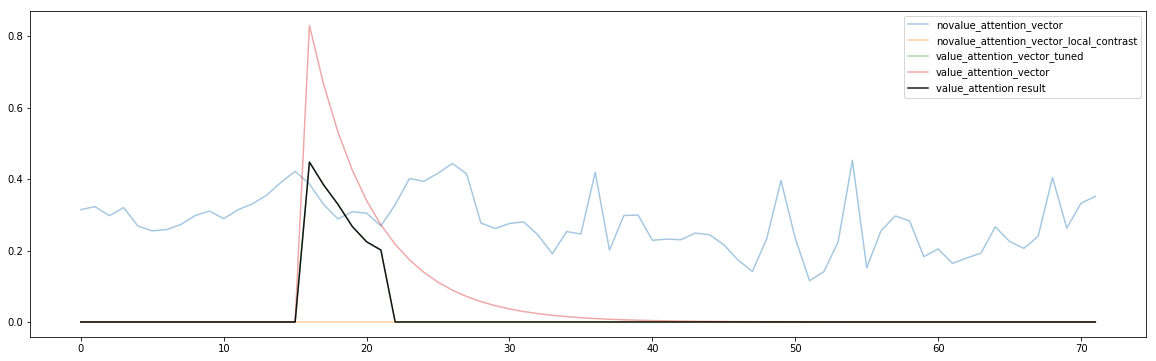

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

max value: ContractSubject.Charity Благотворительность prob: 0.19272934198379515 
contract subj: ContractSubject.Charity
Max contract sum: 950945.51 RUB prob: 0.31336716963350775
Устав, я сел:
	Совет директоров Благотворительность
[(<OrgStructuralLevel.BoardOfDirectors: 2>, (1.7976931348623157e+308, -1))]


------------------------------


Поиск нарушений
CharterParser.constraints are deprecated ☠️! 
 Use CharterDocument.value_constraints


Сумма Договора:


render_color_text


Проверка нарушений: обработано ✓


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Please select "Протокол" .docx file:


Saving МНПЗ 1 Протокол_ГПН-МНПЗ благотвор.doc to МНПЗ 1 Протокол_ГПН-МНПЗ благотвор.doc
User uploaded file "МНПЗ 1 Протокол_ГПН-МНПЗ благотвор.doc" with length 76288 bytes
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f3ba4bfd308>)
Символов в оригинальном документе: 4486
ProtocolDocument text: len(4486)
----------------- LegalDocument legal_doc deleted. Ciao bella!
🐌 Embedding 587 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0425 07:59:31.183966 139902913066880 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (1, 587, 1024)
Function _emb called 10 times. 
Execution time max: 20.5951, average: 8.6582
Function _embedd_large called 2 times. 
Execution time max: 26.8958, average: 26.4295
Function calculate_distances_per_pattern called 57 times. 
Execution time max: 2.9495, average: 0.3077
❤️ ACCOMPLISHED: 	 0.	 Document embedded into ELMO space


nlp_tools/patterns.py:190: RuntimeWarning: All-NaN slice encountered
  min = np.nanmin(b)
nlp_tools/patterns.py:191: RuntimeWarning: All-NaN slice encountered
  max = np.nanmax(b)
nlp_tools/patterns.py:192: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(b)
nlp_tools/demo_protocols.py:303: RuntimeWarning: All-NaN slice encountered
  dist_per_pat.append(np.nanmin(row))


❤️ ACCOMPLISHED: 	 1.	 value found


render_color_text


Протокол: сделано✓


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Сумма контракта: 950945.51 RUB вероятность: 0.31336716963350775
Полная инфо:((950945.51, 'RUB'), (395, 479), 'сделку – заключение договора о безвозмездной помощи ( пожертвование ) между акционерное общество « газпромнефть-мнпз » и фондом поддержки социальных инициатив « родные города » на оказание благотворительной помощи фонду поддержки социальных инициатив « родные города », в том числе на организацию проекта просветительского характера – турнира по нефтегазовой тематике « умножая таланты », проводимого в регионах деятельности группы компаний газпром нефть в 2019 году, в размере 950945,51 ( девятьсот пятьдесят тысяч девятьсот сорок пять ) рублей 51 копейка.', {'tokens': 587, 'index found': 466, 'd-range': (0.1946310868630042, 0.37543126225041645), 'confidence': 0.20649521190142756, 'mean': 0.3153928699495347, 'std': 0.024936729988047343, 'min': 0.1946310868630042})
Сумма протокола: 950945.51


<IPython.core.display.Javascript object>

In [5]:
_#@title Обработка документов { vertical-output: true, output-height: 800, display-mode: "form" }

# VI: @artifex from here:
import traceback

def init_all():
  ## do preparation here   
  # 1.
  #_init_import_code_from_gh()
  # 2.
  _init_embedder()
  # 3.
  _init_the_code()
  # 4.
  _init_charters()
  # 5.
  _init_contracts()


def process_charter(tb):
  uploaded = interactive_upload('Устав, он лег спать')
  try:

    _CTX = GLOBALS__['CharterAnlysingContext']
    _CTX.verbosity_level=2
    _CTX.analyze_charter(uploaded[0], True)

    tb.clear_tab()

    GLOBALS__['renderer'].render_charter_parsing_results_2(_CTX.charter)
    GLOBALS__['renderer'].render_contents(_CTX.doc)
  except Exception as e:
    print(f"💥\033[1;31mОшибка:{e}\033[1;0m")
    print(traceback.format_exc())

def process_contract(tb):
  uploaded = interactive_upload('Договор')
  tb.clear_tab()

  try:
    GLOBALS__['ContractAnlysingContext'].analyze_contract(uploaded[0])
    doc = GLOBALS__['ContractAnlysingContext'].contract

    # tb.clear_tab()

    GLOBALS__['renderer'].render_subj(doc)
    GLOBALS__['renderer'].render_contents(doc)
  except Exception as e:
    print(f"💥\033[1;31mОшибка:{e}\033[1;0m")
    print(traceback.format_exc())

def compare_with_charter(tb):
  tb.clear_tab() 
  try:
    
    phrase, need_protocol = f0_compare_with_charter()
    out_headline(phrase)
    print('-'*30)
    
    _CTX = GLOBALS__['CharterAnlysingContext']
    GLOBALS__['renderer'].render_contents(_CTX.doc)
    find_and_show_violations()

    return need_protocol
  except:
    print(f"💥\033[1;31mОшибка:{sys.exc_info()}\033[1;0m")
    print(traceback.format_exc())
    return True
  
  
def start_wizard(tb):
  def step1():
    with tb.output_to(0):
      print(f"\033[1;32mСм. следующие табы\u2713")
    
    b2.render_to(tb, 1, cleartab=True)

  def step2():
    with tb.output_to(1):      
      tb.clear_tab()
      process_charter(tb) 
      
      print(f"\033[1;32mУстав: обработано \u2713")  
      b2.render()
    
    b3.render_to(tb, 2, cleartab=True)

  def step3():    
    with tb.output_to(2):
      tb.clear_tab()
      process_contract(tb)
      
      print(f"\033[1;32mДоговор: обработано \u2713")  
      b3.render()
    
    b4.render_to(tb, 3, cleartab=True)

  def step4():
    with tb.output_to(3):

      need_protocol = compare_with_charter(tb)
      
      print(f"\033[1;32mПроверка нарушений: обработано \u2713")  
      b4.render()
    
    with tb.output_to(4):
      tb.clear_tab()
      b5.render()
      b6.render()
      
  def step5():
    with tb.output_to(4):
      tb.clear_tab()
      uploaded = interactive_upload('Протокол')
      try:
        GLOBALS__['ProtocolAnlysingContext'].process(uploaded[0])        
      except:
        print(f"💥\033[1;31mОшибка:{sys.exc_info()}\033[1;0m")
        print(traceback.format_exc())
        
      print(f"\033[1;32mПротокол: сделано\u2713")  
      b5.render()
      b6.render()

    b7.render_to(tb, 5, cleartab=True)

      
  def without_protocol_step5():
    with tb.output_to(4):
      tb.clear_tab()
      out_headline("Нарушение: Одобрение по сделке в протоколе отсутствует (нет протокола)")
      b5.render()
      b6.render()
    
  def step6():
    with tb.output_to(5):
      tb.clear_tab()
      b7.render()
      f0_compare_with_protocol()
                                     
  b1 = InvokeButton('Начнём', step1)
  b2 = InvokeButton('Устав...', step2)
  b3 = InvokeButton('Договор...', step3)
  b4 = InvokeButton('Сравнить с уставом...', step4)
  b5 = InvokeButton('Протокол...', step5)
  b6 = InvokeButton('Протокол отсутствует', without_protocol_step5)
  
  b7 = InvokeButton('Сравнить с протоколом...', step6)
  
  with tb.output_to(0): 
    try:     
      
      init_all()
            
    except:
      print(f"💥\033[1;31mОшибка:{sys.exc_info()}\033[1;0m")
      print(traceback.format_exc())

  b2.render_to(tb, 1, cleartab=True)
  b3.render_to(tb, 2, cleartab=True)
  b4.render_to(tb, 3, cleartab=True)

  b1.render_to(tb, 0, cleartab=False)


tb2 = widgets.TabBar(['Начало', 'Устав', 'Договор', 'Сравнение с уставом', 'Протокол', 'Сравнение с протоколом'], location='top')    
start_wizard(tb2)